In [26]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import lognorm

In [27]:
underlying = 165
strike = 165
days=15
tradingDayYear=365
ttm = days/tradingDayYear
rf = 0.0425

In [28]:
def integral_bsm(call, underlying, strike, days, rf, ivol, tradingDayYear):
    ttm = days/tradingDayYear

    dailyVol = ivol / np.sqrt(tradingDayYear)

    sigma = np.sqrt(days)*dailyVol
    mu = np.log(underlying) + ttm*rf - 0.5*sigma**2
    pdf = lambda x: 1 / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((np.log(x) - mu) / sigma)**2)

    if call == True:
        f = lambda x: max(0, x-strike) * pdf(x)
        val, _ = quad(f, 0, strike*100)
    else:
        g = lambda x: max(0, strike-x) * pdf(x)
        val, _ = quad(g, 0, strike*100)

    return val * np.exp(-rf*ttm)


In [29]:
vec = np.linspace(0.1, 0.8, 8) 
c = []
p = []
for v in vec:
    x = integral_bsm(True, underlying,strike,days,rf,v,tradingDayYear)
    c.append(x)
    y = integral_bsm(False, underlying,strike,days,rf,v,tradingDayYear)
    p.append(y)

/Users/fend/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fend/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

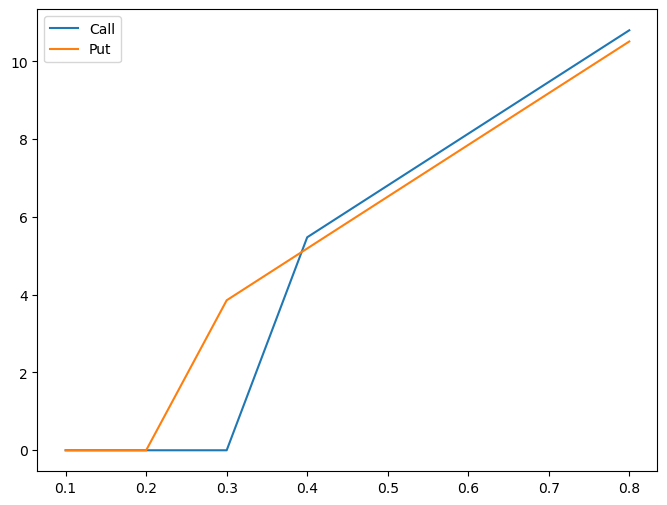

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
vec = np.linspace(0.1, 0.8, 8) 
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(vec, c, ax=ax, label='Call')
sns.lineplot(vec, p, ax=ax, label='Put')